# K-means
1. Indicar cantidad de clusters.
2. Ubicar centroides alatoriamente.
3. Cada punto se asigna al centroide mas cercano.
4. Recalcular centroides con el promedio.
5. Repetir paso 3 y 4 hasta que no se muevan los centroides.

Reducir la distancia que se encuentra entre cada punto y su centroide elevanda al cuadrado
![formula_kmeans](./img/formula_kmeans.png)


## Ventajas
+ Alto performance.
+ Simple.
+ Resultados interpretables.
+ Garantiza convergencia.
+ Se adapta a nuevos datos.

## Desventajas
+ Replicabilidad.
+ Le afectan outliers.
+ Mejor performance en datos esféricos.
+ Debo elegir K manualmente.

## Cuando implementarlo
+ Conozco la cantidad de clusters que espero.
+ Resultados rápidos.
+ Resultados interpretables.
+ Forma de datos esférica.
+ Resultados escalables.

![formas_esfericas](./img/formas_esfericas.png)



## Importar librerias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [6]:
# x: Datos en dos dimensiones, y: cluster a los que pertennece cada datapoint y c: la coordenada de los centroides
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [7]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:, 0],
        'x2': X[:, 1],
        'y': y
    }
)

In [8]:
df_blobs.head()

,x1,x2,y
0,7.889738,-4.971264,3
1,-3.590204,2.234617,2
2,-1.992447,-5.467541,0
3,-1.850286,2.837856,1
4,-5.270549,0.984022,2


In [9]:
df_centers = pd.DataFrame(
    {
        'x1': c[:, 0],
        'x2': c[:, 1]
    }
)

In [10]:
df_centers.head()

,x1,x2
0,-0.754370,-5.039672
1,-2.189723,2.463285
2,-4.590154,1.683051
3,8.484483,-4.839605


## Visualización de datos

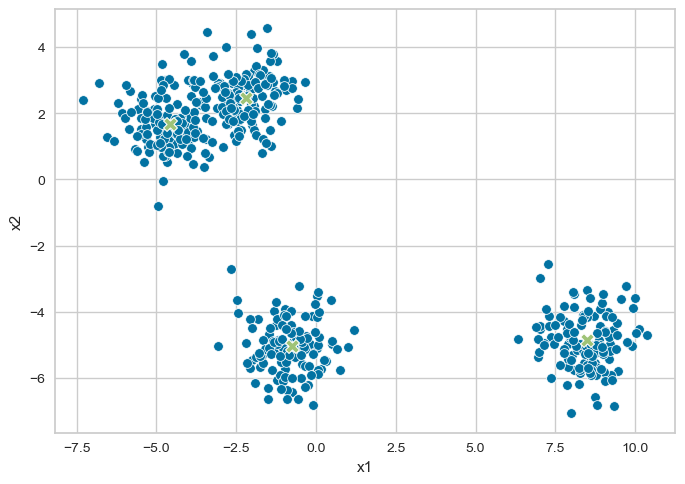

In [11]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [12]:
k_means = KMeans(n_clusters=4, n_init='auto')
df_cluster = k_means.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = k_means.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1': k_means_centers[:, 0],
        'x2': k_means_centers[:, 1],
    }
)

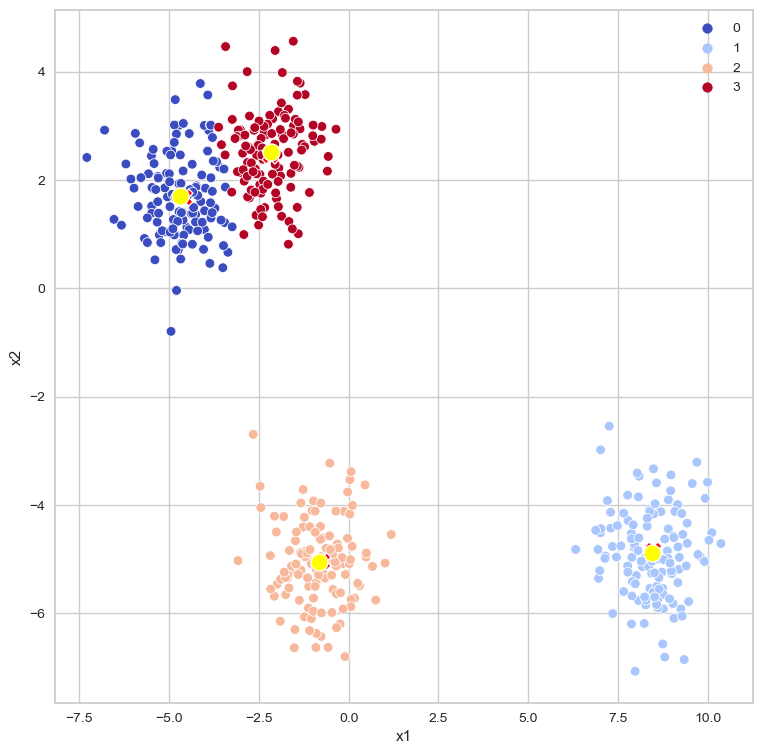

In [13]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150, color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150, color='yellow')
plt.show()

## Método del codo (Elbow)
Consiste en graficar la inercia o la suma de los errores cuadraticos en el k-means, con diferentes k y se selecciona el valor que se encuentra en el codo.

![metodo_codo](./img/metodo_codo.png)

Para graficar esto se usa WCSS

![WCSS](./img/WCSS.png)


In [16]:
def vis_cluster(k):
    k_means = KMeans(n_clusters=k, n_init='auto')
    df_cluster = k_means.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = k_means.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1': k_means_centers[:, 0],
            'x2': k_means_centers[:, 1],
        }
    ) 
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


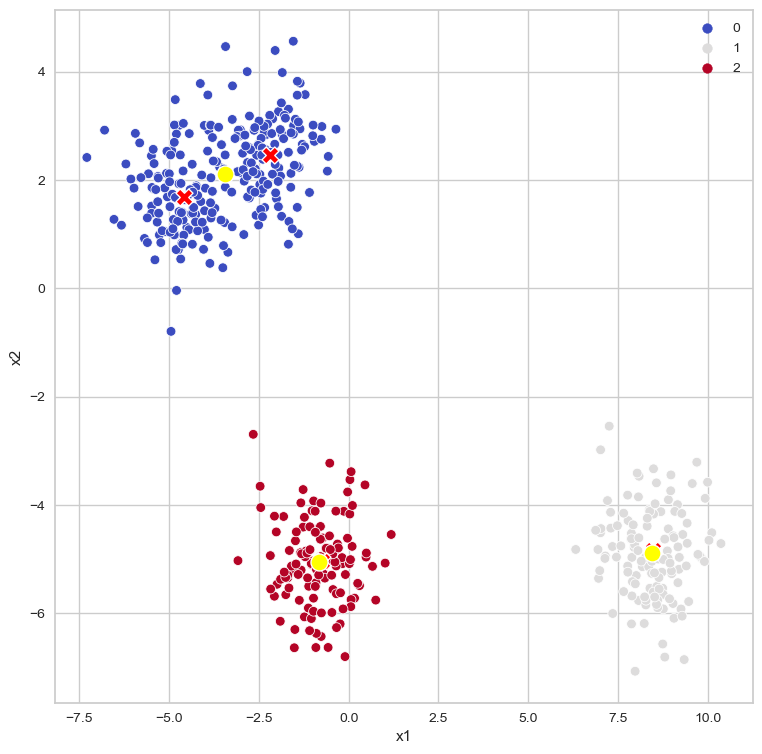

4


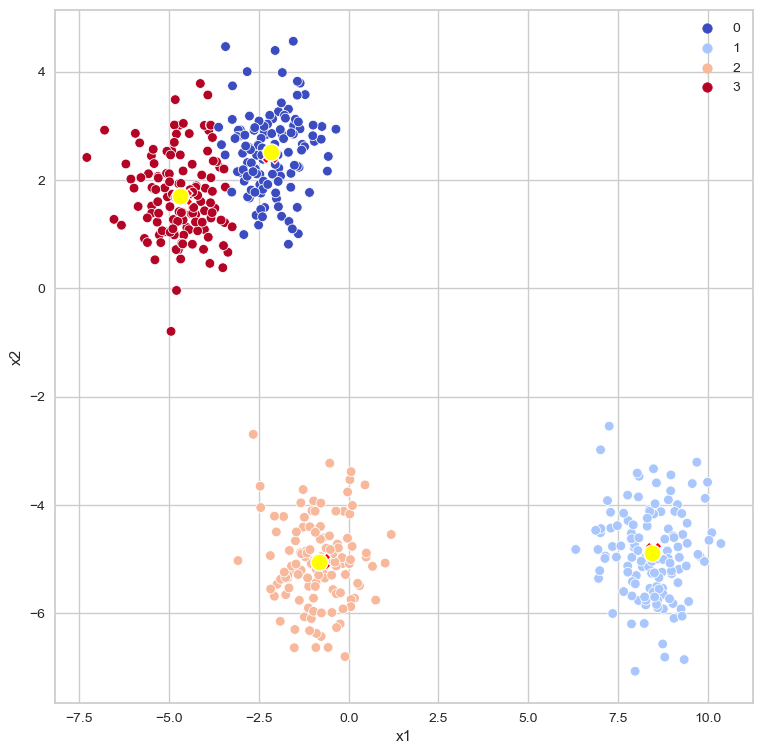

5


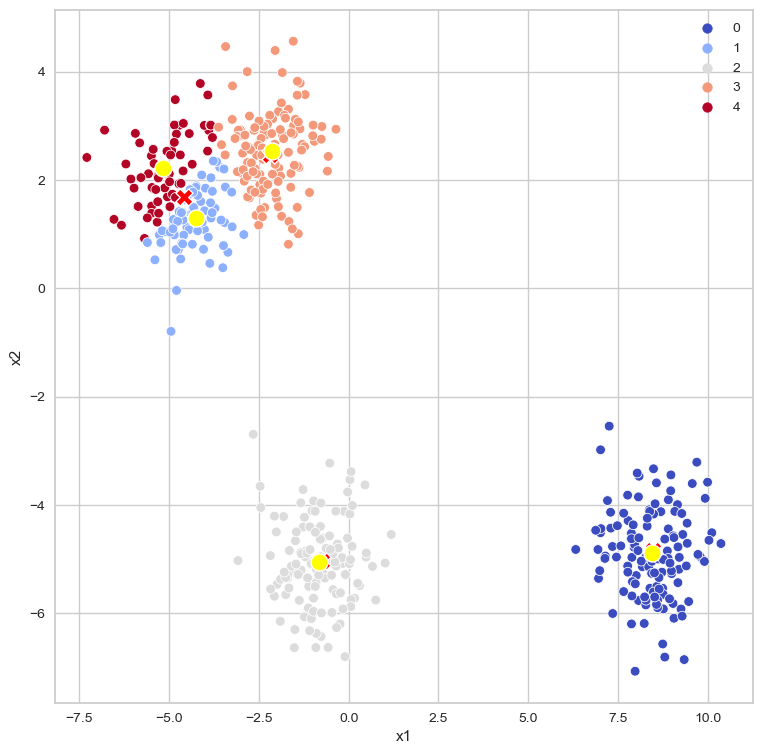

6


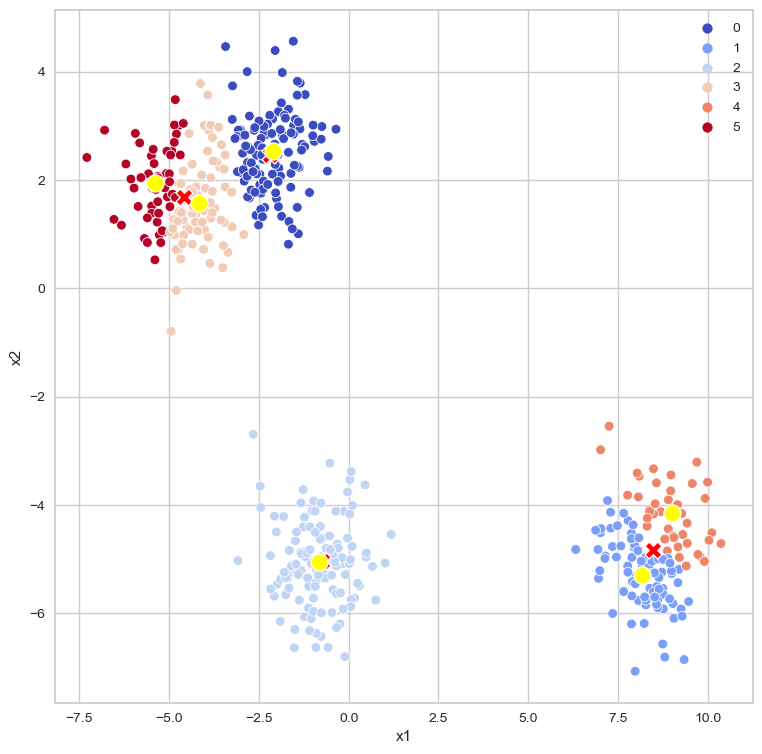

In [17]:
for _ in range(3, 7):
    print(_)
    vis_cluster(_)
    

## Encontrando el valor de K

### Usando el metodo del codo

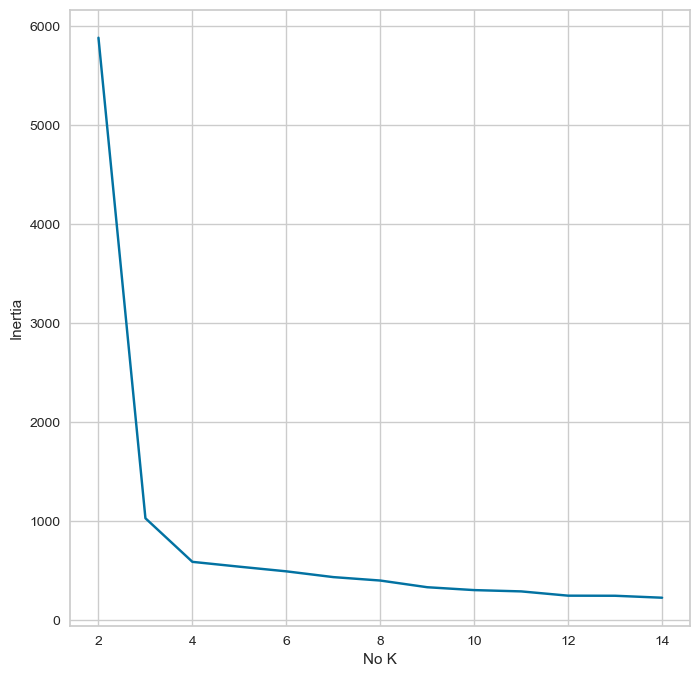

In [19]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('No K')
plt.ylabel('Inertia')
plt.show()

### Usando el metodo de silueta

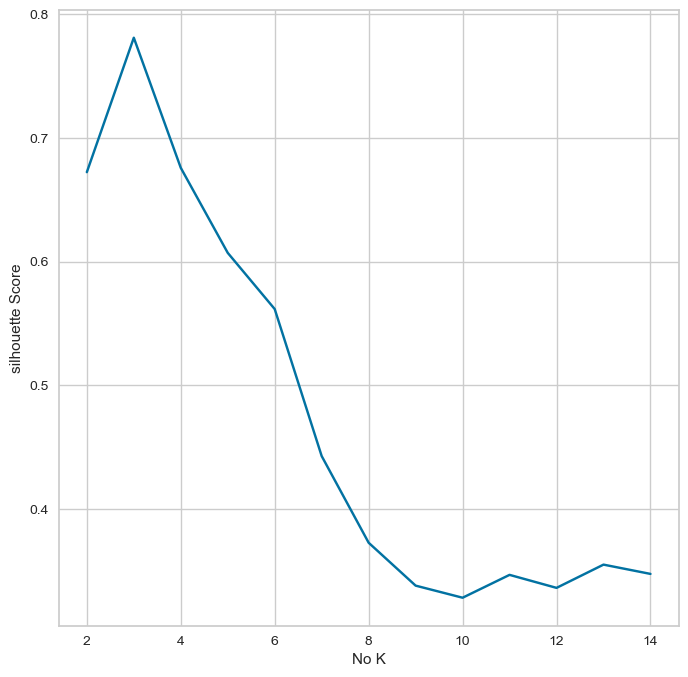

In [22]:
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))

plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('No K')
plt.ylabel('silhouette Score')
plt.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, n_init='auto'))

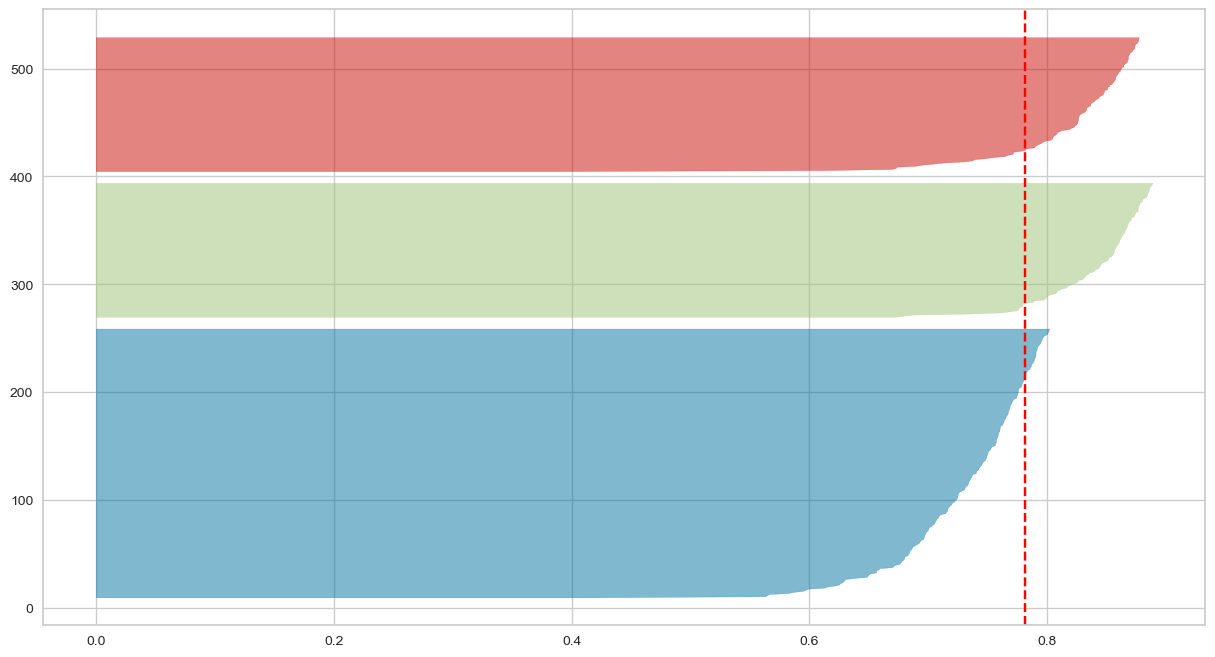

In [25]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=3, n_init='auto') 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, n_init='auto'))

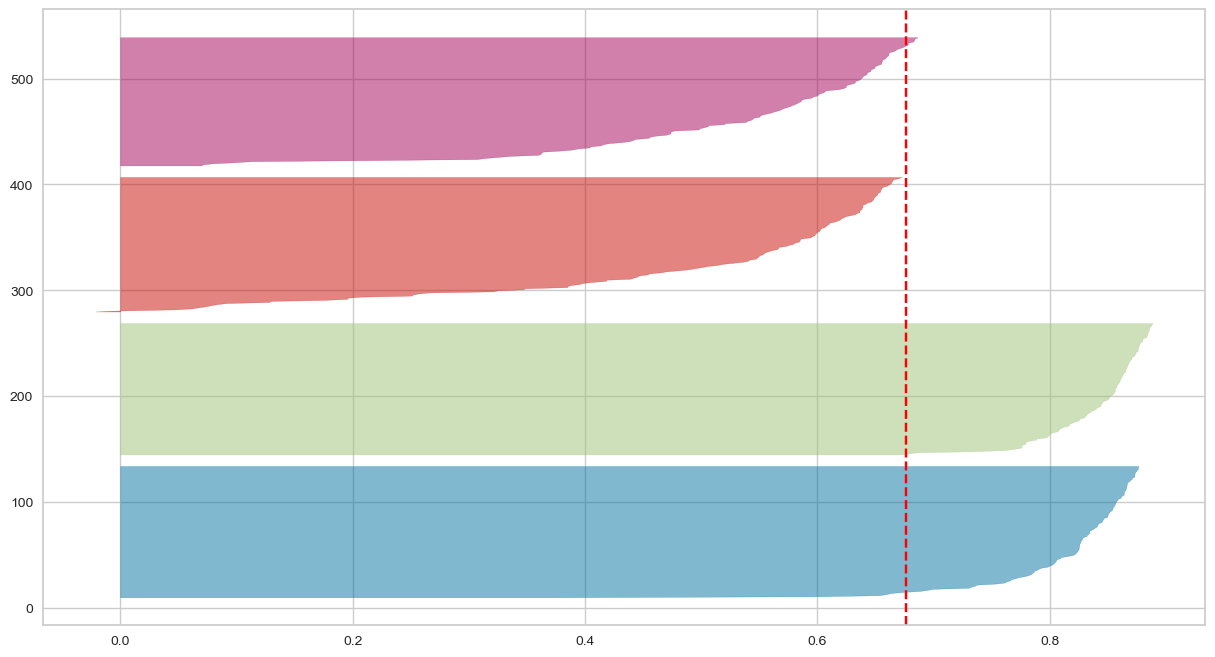

In [24]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4, n_init='auto') 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)